# convert pleco dump to spreadsheet

In [1]:
#import xml file
import xml.etree.ElementTree as ET
import csv
tree = ET.parse('./Report.xml')
root = tree.getroot()
card_data = []
for card in root.findall(".//card"):
    card_datum = {}
    card_datum["created_stamp"] = card.get("created")
    card_datum["modified_stamp"] = card.get("modified")
    
    entry = card.find("./entry")
    card_datum["traditional"] = entry.find("./headword[@charset='tc']").text

    if entry.find("./cantopron") is None:
        continue
    card_datum["jyutping"] = entry.find("./cantopron").text
    
    if card.find("scoreinfo") is None:
        continue
    card_datum["correct"] = int(card.find("scoreinfo").get("correct"))
    card_datum["incorrect"] = int(card.find("scoreinfo").get("incorrect"))
    card_datum["difficulty"] = int(card.find("scoreinfo").get("difficulty"))
    card_datum["priority"] = card.find("scoreinfo").get("priority")
    card_datum["last_reviewed_stamp"] = int(card.find("scoreinfo").get("lastreviewedtime"))
    card_data.append(card_datum)
    
    

    
    
#convert xml to csv
import pandas as pd
cards_frame = pd.DataFrame(card_data)
for stamp in ["last_reviewed_stamp","created_stamp","modified_stamp"]:
    cards_frame[stamp] = pd.to_datetime(cards_frame[stamp],unit='s')
    
cards_frame.sort_values("created_stamp", ascending=False,inplace=True)
cards_frame.to_csv('./Report.csv', index = False)


# View 30 Most Recently Added Vocabs

In [2]:
#30 most recently added
cards_frame.sort_values("created_stamp", ascending=False).head(30)

,created_stamp,modified_stamp,traditional,jyutping,correct,incorrect,difficulty,priority,last_reviewed_stamp
886,2021-09-01 19:41:53,2021-09-01 19:44:38,不停,bat1 ting4,1,1,90,None,2021-09-09 21:16:39
885,2021-09-01 19:32:38,2021-09-01 19:44:38,一鑊熟,jat1 wok6 suk6,1,1,90,None,2021-09-09 21:34:02
884,2021-09-01 19:32:06,2021-09-01 19:44:38,鬼婆,gwai2 po4,1,1,90,None,2021-09-09 21:35:20
883,2021-09-01 19:31:41,2021-09-01 19:44:38,食蕉,sik6 ziu1,2,0,100,None,2021-09-09 21:17:11
882,2021-09-01 19:31:12,2021-09-01 19:44:38,拍烏蠅,paak3 wu1 jing1,1,1,90,None,2021-09-09 21:35:28
881,2021-09-01 19:30:31,2021-09-01 19:44:38,十問九唔應,sap6 man6 gau2 m4 jing3,1,0,100,None,2021-09-05 15:04:09
880,2021-09-01 19:29:19,2021-09-01 19:44:38,一天都光晒,jat1 tin1 dou1 gwong1 saai3,1,0,100,None,2021-09-05 15:09:00
879,2021-09-01 19:28:48,2021-09-01 19:44:38,反胃,faan2 wai6,1,1,90,None,2021-09-09 21:15:55
878,2021-09-01 19:28:09,2021-09-01 19:44:38,打冷震,daa2 laang5 zan3,1,1,90,None,2021-09-09 21:19:00
877,2021-09-01 19:27:45,2021-09-01 19:44:38,出世,ceot1 sai3,0,2,90,None,2021-09-09 21:15:48


# View 30 Most Recently Reviewed Vocabs

In [3]:
#30 most recently reviewed
cards_frame.sort_values("last_reviewed_stamp", ascending=False).head(30)

,created_stamp,modified_stamp,traditional,jyutping,correct,incorrect,difficulty,priority,last_reviewed_stamp
543,2020-11-04 00:58:48,2021-09-09 21:30:45,士多,si6 do1,0,1,90,None,2021-09-09 21:35:36
882,2021-09-01 19:31:12,2021-09-01 19:44:38,拍烏蠅,paak3 wu1 jing1,1,1,90,None,2021-09-09 21:35:28
884,2021-09-01 19:32:06,2021-09-01 19:44:38,鬼婆,gwai2 po4,1,1,90,None,2021-09-09 21:35:20
557,2020-11-04 16:25:47,2021-08-14 15:57:53,葡萄牙,pou4 tou4 ngaa4,1,4,80,None,2021-09-09 21:35:12
869,2021-09-01 19:19:35,2021-09-01 19:44:38,泰國,taai3 gwok3,1,1,90,None,2021-09-09 21:35:05
539,2020-10-28 20:29:48,2021-08-14 15:56:08,牛扒,ngau4 paa2,1,3,80,None,2021-09-09 21:35:00
872,2021-09-01 19:22:06,2021-09-01 19:44:38,婆婆,po4 po2,2,0,100,None,2021-09-09 21:34:53
871,2021-09-01 19:21:56,2021-09-01 19:44:38,爭,zang1,1,1,90,None,2021-09-09 21:34:45
863,2021-08-14 16:11:16,2021-08-14 16:34:13,文字,man4 zi6,1,3,80,None,2021-09-09 21:34:40
868,2021-09-01 19:19:14,2021-09-01 19:44:38,時差,si4 caa1,1,1,90,None,2021-09-09 21:34:28


# View 30 Random Vocabs

In [4]:
#30 random words
cards_frame.sample(frac=1).head(30)

,created_stamp,modified_stamp,traditional,jyutping,correct,incorrect,difficulty,priority,last_reviewed_stamp
820,2021-05-22 15:44:40,2021-07-23 16:14:07,磨豆腐,mo4 dau6 fu6,1,0,100,None,2021-05-27 19:33:37
198,2020-04-22 11:15:20,2021-07-23 16:14:07,湯,tong1,11,8,58,None,2021-03-16 17:17:29
321,2020-06-01 11:40:22,2021-07-23 16:14:07,信用卡,seon3 jung6 kaat1,10,12,50,None,2021-03-16 16:58:04
168,2020-04-11 03:15:27,2021-07-23 16:14:07,馬騮仔,maa5 lau4 zai2,5,18,82,None,2020-11-30 19:07:31
280,2020-05-16 01:57:48,2021-07-23 16:14:07,瞓覺,fan3 gaau3,4,14,70,None,2021-02-07 20:08:00
179,2020-04-15 20:06:47,2021-07-23 16:14:07,青豆,ceng1 dau5,11,16,58,None,2021-03-16 16:57:28
185,2020-04-15 20:37:14,2021-07-23 16:14:07,蔥,cung1,12,4,94,None,2021-03-20 17:10:51
765,2021-04-08 18:51:56,2021-07-30 18:25:36,蔥油餅,cung1 jau4 beng2,0,2,88,None,2021-05-27 20:03:14
402,2020-06-22 13:42:33,2021-07-23 16:14:07,古巴,gu2 baa1,4,4,80,None,2021-03-24 22:45:23
553,2020-11-04 01:10:01,2021-09-09 21:30:45,魚蛋,jyu4 daan2,0,0,100,low,1970-01-01 00:00:00


# Cell Reserved for Searching

In [5]:
cards_frame[cards_frame.traditional.str.contains('朝')]

,created_stamp,modified_stamp,traditional,jyutping,correct,incorrect,difficulty,priority,last_reviewed_stamp
861,2021-08-14 16:10:12,2021-08-14 16:34:13,朝鮮,ciu4 sin1,1,3,80,low,2021-09-09 21:31:07
699,2021-02-09 21:22:07,2021-07-23 16:14:07,今朝,gam1 ziu1,2,0,100,None,2021-03-16 16:32:29
565,2020-11-18 03:55:50,2021-08-14 16:00:28,朝早,ziu1 zou2,1,3,82,None,2021-09-09 21:33:53


<class 'pandas._libs.tslibs.timestamps.Timestamp'>
DatetimeIndex(['2021-09-04', '2021-09-05', '2021-09-06', '2021-09-07',
               '2021-09-08', '2021-09-09', '2021-09-10'],
              dtype='datetime64[ns]', freq='D')


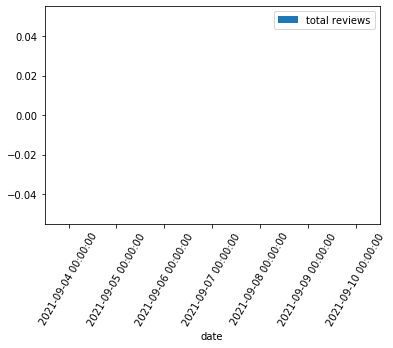

In [7]:
import datetime



today = pd.to_datetime("today").round('1d')
print(type(today))
week_range = pd.date_range(today-pd.Timedelta(days=6),today,freq='d')
print(week_range)
date2count ={"date":week_range,"total reviews":[0]*7}
for card_stamp in cards_frame["last_reviewed_stamp"]:
    if card_stamp in week_range:
        if card_stamp in date2count["date"]:
            date2count["total reviews"][list(week_range).index(card_stamp)] += 1
            

datesframe = pd.DataFrame(date2count)
datesframe

datesframe.plot.bar(x='date', y='total reviews', rot=60)
